<a href="https://colab.research.google.com/github/Bickmore664/newGITTest/blob/master/Bivariate_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

height = [60, 62, 65, 68, 70, 74]
weight = [140, 138, 150, 166, 190, 250]

print(np.corrcoef(height, weight))
print('\n')
print(round(np.corrcoef(height, weight)[0][1], 2)) # print only the r rather than the whole matrix

[[1.         0.92989745]
 [0.92989745 1.        ]]


0.93


In [ ]:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df.charges.corr(df.age)

0.2990081933306476

In [ ]:
from scipy import stats
corr = stats.pearsonr(df.charges, df.age)
print('r: \t' + str(round(corr[0], 4)))
print('p-value:' + str(round(corr[1], 4)))

r: 	0.299
p-value:0.0


In [ ]:
print(corr)

(0.2990081933306476, 4.8866933317203816e-29)


In [ ]:
# Create an empty DataFrame to store the correlations and p-values
corr_df = pd.DataFrame(columns=['r', 'p-value'])

for col in df:  # Use this to loop through the insurance.csv DataFrame
  if pd.api.types.is_numeric_dtype(df[col]): # Only calculate r, p-value for the numeric columns
    r, p = stats.pearsonr(df.charges, df[col])
    corr_df.loc[col] = [round(r, 3), round(p, 3)]

corr_df.sort_values(by=['r'], ascending=False)

,r,p-value
charges,1.000,0.000
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


In [ ]:
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df.head()

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
0,Bulbasaur,grass,poison,6.9,45,49,49,45,1,0
1,Ivysaur,grass,poison,13.0,60,62,63,60,1,0
2,Venusaur,grass,poison,100.0,80,100,123,80,1,0
3,Charmander,fire,NaN,8.5,39,52,43,65,1,0
4,Charmeleon,fire,NaN,19.0,58,64,58,80,1,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

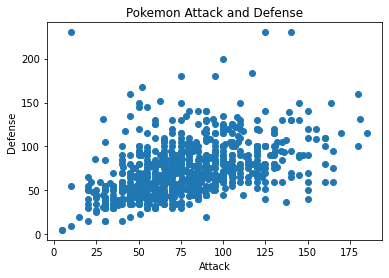

In [ ]:
plt.scatter(df.attack, df.defense)
plt.title('Pokemon Attack and Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

In [ ]:
from scipy import stats
results = stats.pearsonr(df.attack, df.defense)
print('r: ' + str(round(results[0], 5)))
print('p: ' + str(round(results[1], 5)))


r: 0.46891
p: 0.0


In [ ]:
legendary = df[df.is_legendary ==1]
non_legendary = df[df.is_legendary==0]


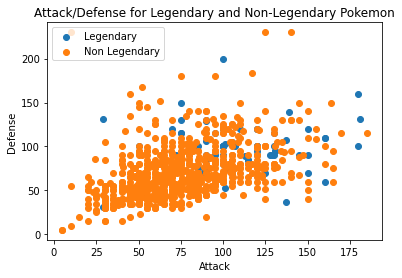

In [ ]:
plt.scatter(legendary.attack, legendary.defense, label='Legendary')
plt.scatter(non_legendary.attack, non_legendary.defense, label='Non Legendary')

plt.legend()
plt.title('Attack/Defense for Legendary and Non-Legendary Pokemon')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show();

In [ ]:
lsample = legendary.sample(50)
nsample = non_legendary.sample(50)

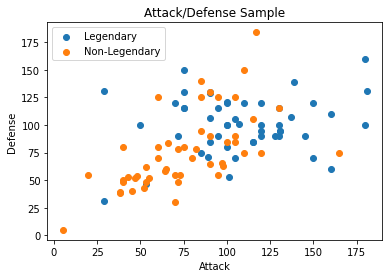

In [ ]:
plt.scatter(lsample.attack, lsample.defense, label='Legendary')
plt.scatter(nsample.attack, nsample.defense, label='Non-Legendary')

plt.legend()
plt.title('Attack/Defense Sample')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show();

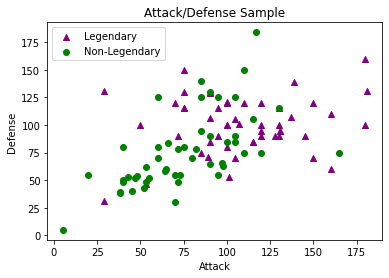

In [ ]:
plt.scatter(lsample.attack, lsample.defense, label='Legendary', marker='^', color='purple')
plt.scatter(nsample.attack, nsample.defense, label='Non-Legendary', marker='o', color='green')

plt.legend()
plt.title('Attack/Defense Sample')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show();

r: 0.7169
p: 0.0


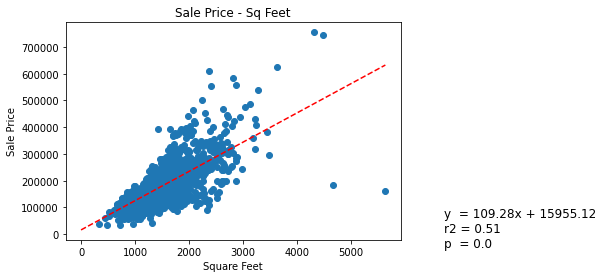

In [ ]:
df = pd.read_csv('http://www.ishelp.info/data/housing.csv')
plt.scatter(df.TotalSF, df.SalePrice)
plt.title('Sale Price - Sq Feet')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')


corr = stats.pearsonr(df.TotalSF, df.SalePrice)
print('r: ' + str(round(corr[0], 4)))
print('p: ' + str(round(corr[1], 4)))

# Calculate the regression line
m, b, r, p, err = stats.linregress(df.TotalSF, df.SalePrice)

# Create the index used for the line plot by using the range function from
# zero to the max value of the numeric feature
num = df.TotalSF.max()
nums = range(num)

# This line plot requires(index list, slope * index list + y-intercept, line format)
# For a complete list of line formats: https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
plt.plot(nums,m * nums + b,"r--")

# Add the formula, r squared, and p-value to the figure
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'r2 = ' + str(round(r**2, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()


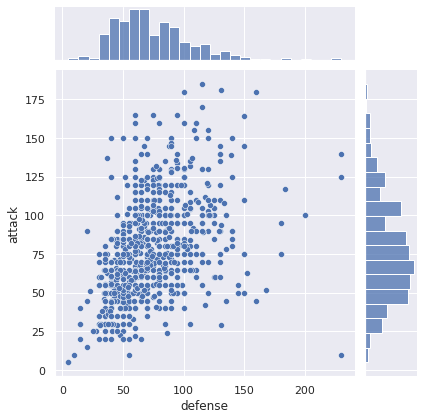

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')

sns.set(color_codes=True)
sns.jointplot(x='defense', y='attack', data=df)

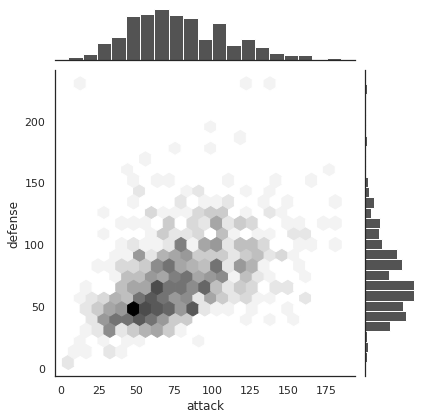

In [ ]:
#Hexbin Plot
with sns.axes_style('white'):
  sns.jointplot(data=df, x='attack', y='defense', kind='hex', color='k');

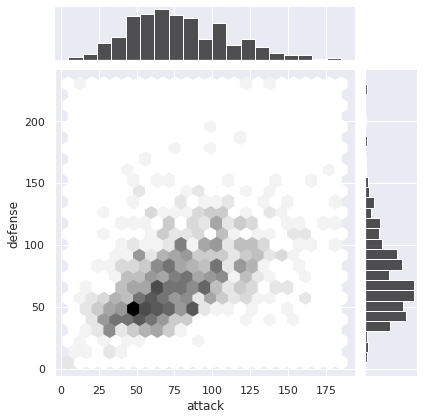

In [ ]:
sns.jointplot(data=df, x='attack', y='defense', kind='hex', color='k');

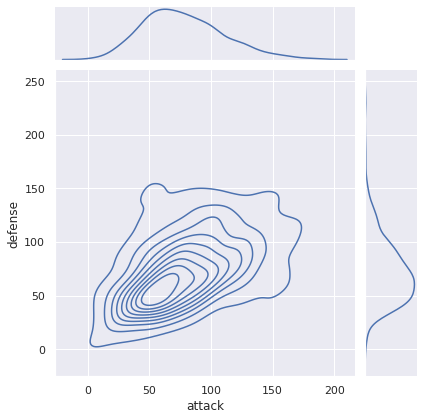

In [ ]:
sns.jointplot(data=df, x="attack", y="defense", kind="kde");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


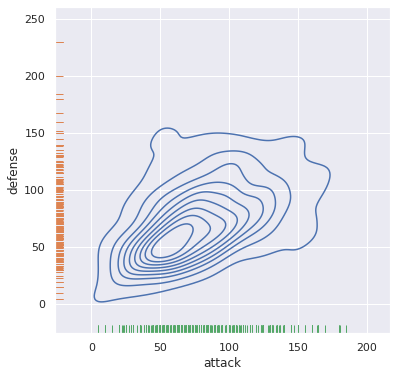

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.attack, df.defense, ax=ax)
sns.rugplot(df.attack, color="g", ax=ax)
sns.rugplot(df.defense, vertical=True, ax=ax);
      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


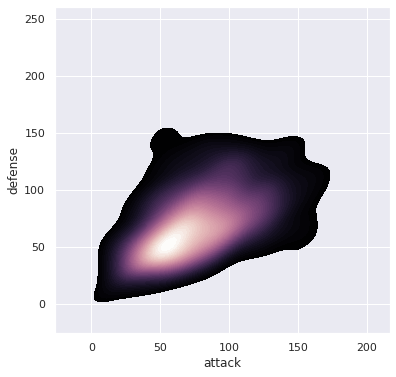

In [ ]:
# Deep contour plot

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.attack, df.defense, cmap=cmap, n_levels=60, shade=True);

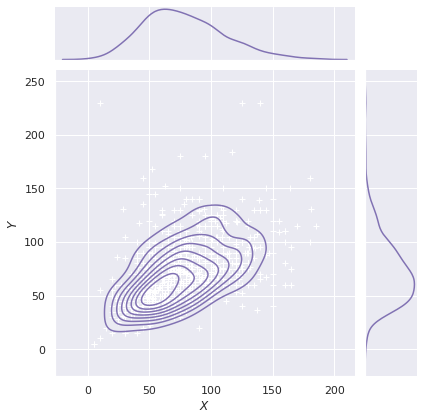

In [ ]:
# Multiple layers on the joint grid

g = sns.jointplot(x="attack", y="defense", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

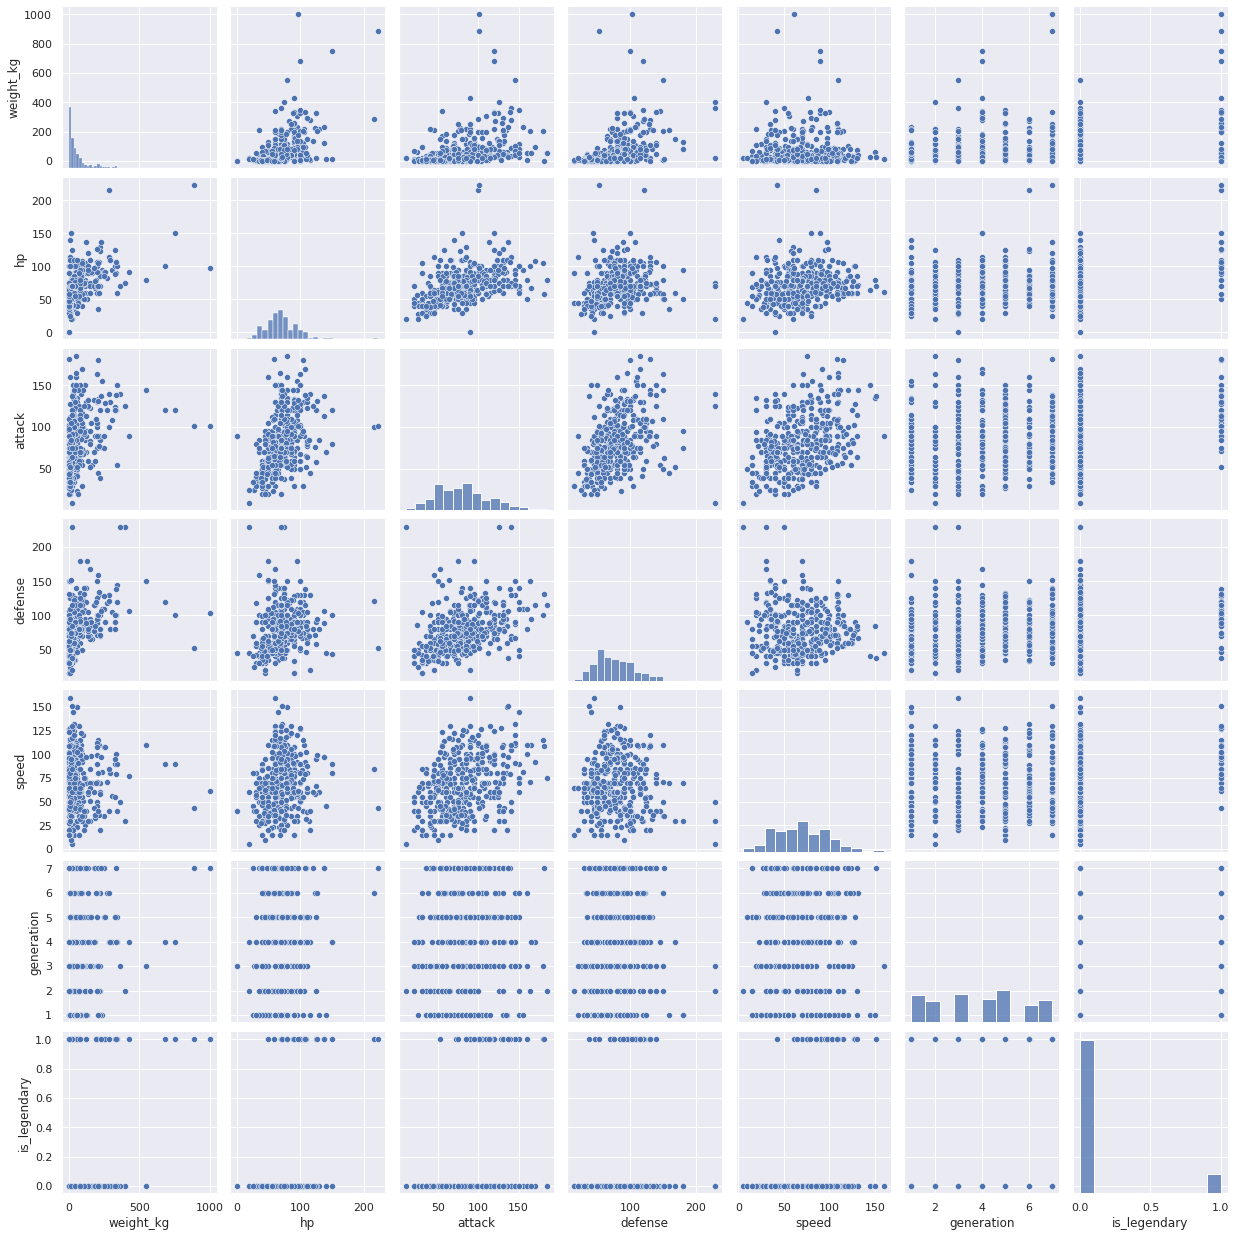

In [ ]:
df.dropna(inplace=True) # remove null values first
sns.pairplot(df);

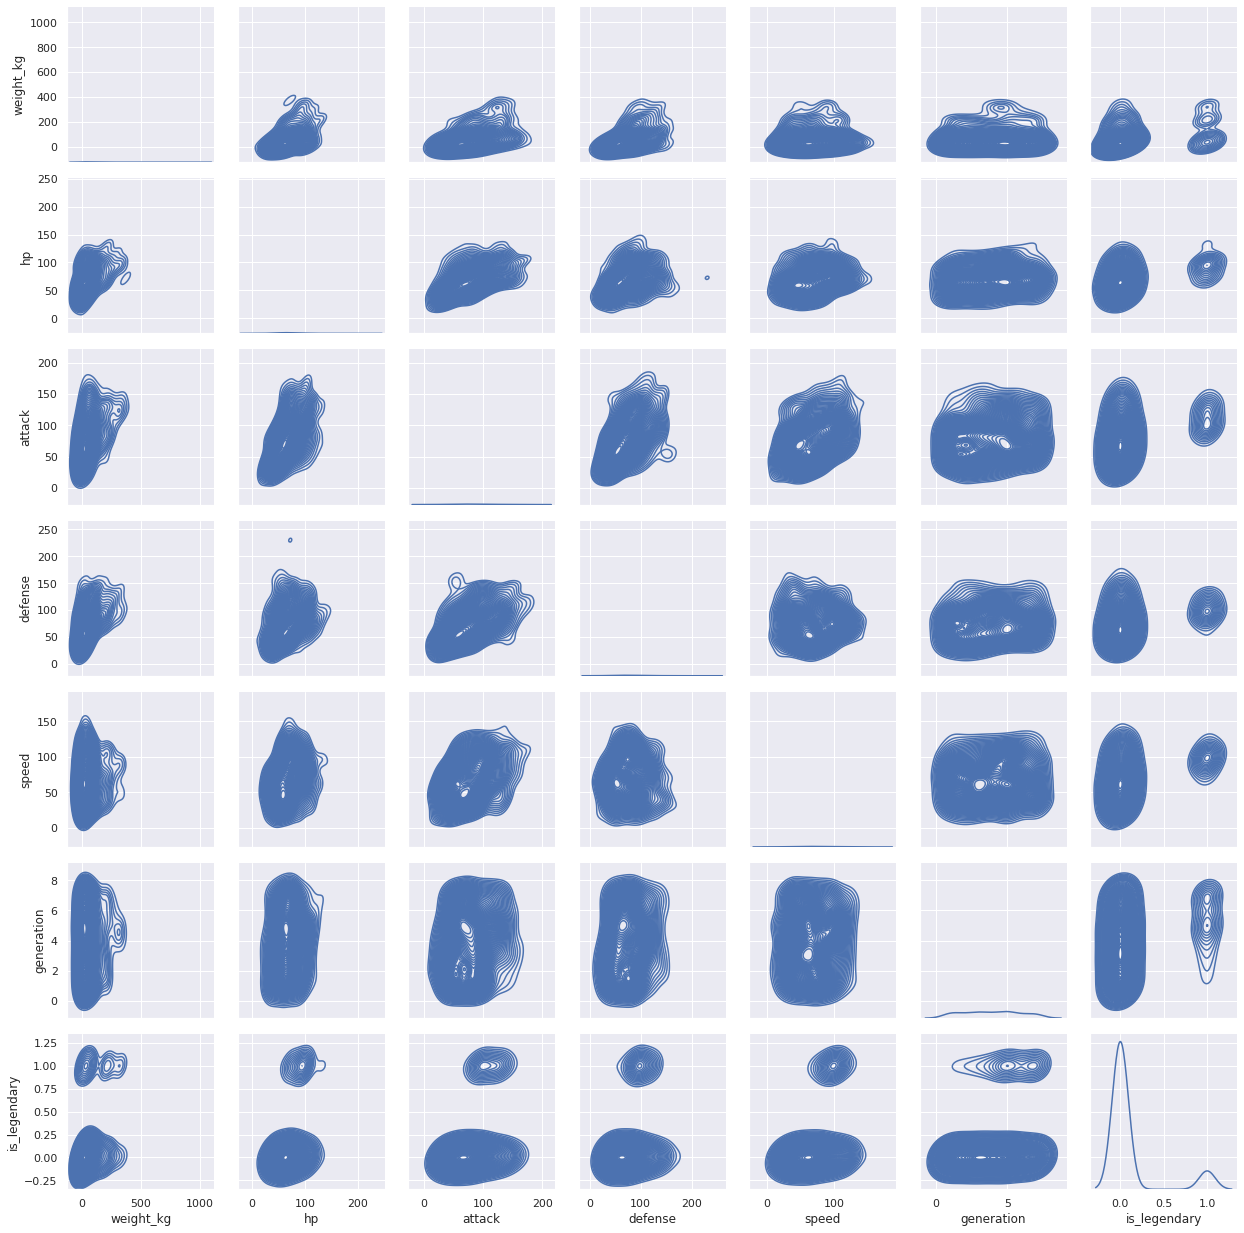

In [ ]:
# Customize the pairplot() by writing to PairGrid

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=60);

Bivariate Category/Number Stats


In [ ]:
# First we need to import scipy and the t-test module
from scipy import stats

# Now lets make two groups: yesCollege and noCollege, each with a list of incomes for each individual
edu_PartialHighSchool = [30000, 10000, 10000, 20000, 70000, 30000, 10000, 20000, 10000, 30000]
edu_HighSchool = [20000, 30000, 60000, 20000, 40000, 60000, 60000]
edu_PartialCollege = [60000, 40000, 30000, 130000, 60000, 40000]
edu_Bachelors = [40000, 20000, 90000, 120000, 60000, 130000, 20000, 100000, 80000, 30000, 100000, 120000]
edu_Graduate = [160000, 50000, 80000, 30000, 40000, 80000, 130000, 100000, 130000, 50000, 130000]

# Now we can run a simple t-test
stats.ttest_ind(edu_PartialHighSchool, edu_HighSchool)

Ttest_indResult(statistic=-1.9131753750607228, pvalue=0.07500898731578687)

In [ ]:
import statistics as stat

print('Partial High School: ' + str(int(stat.mean(edu_PartialHighSchool))))
print('High School:         ' + str(int(stat.mean(edu_HighSchool))))
print('Partial College:     ' + str(int(stat.mean(edu_PartialCollege))))
print('Bachelors:           ' + str(int(stat.mean(edu_Bachelors))))
print('Graduate:            ' + str(int(stat.mean(edu_Graduate))))

F, p = stats.f_oneway(edu_PartialHighSchool, edu_HighSchool, edu_PartialCollege, edu_Bachelors, edu_Graduate)
print(F)
print(p)

Partial High School: 24000
High School:         41428
Partial College:     60000
Bachelors:           75833
Graduate:            89090
5.778065095961635
0.0008781084858501968


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Import the data
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')

# Determine what the feature and label is. I'm "hard-coding" this here so that I can use
# variables names like we will later on when we apply this to the bivstats() function
col = 'smoker'
label = 'charges'

groups = df[col].unique()              # Step 1. Use the unique() function to generate a list of the unique values in this categorical column
# print(groups)
df_grouped = df.groupby(col)           # Step 2. Use the groupby() function to sort the DataFrame by the current categorical column
# print(df_grouped)
group_labels = []                      # Step 3. Create an empty list that will be a two-dimensional list of lists to store the label values associated with each category
for g in groups:                       # Step 4. Loop through the unique cateogry values ('Yes' and 'No' in this case)
  g_list = df_grouped.get_group(g)     # Step 5. Use the get_group() function to return a list containing only the records for each unique value
  # print(g_list)
  group_labels.append(g_list[label])   # Step 6. Use the append() function to store the list of label values created in the prior step into our list-of-lists

oneway = stats.f_oneway(*group_labels)
f = oneway[0]
p = oneway[1]

print("F: " + str(round(f, 3)))
        print("p: " + str(round(p, 3)))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('http://www.ishelp.info/data/bikebuyers.csv')
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No


In [ ]:
df.Education.unique()

array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'], dtype=object)

In [ ]:
df['education_rank'] = df['Education']
df.education_rank.replace(['Partial High School', 'High School', 'Partial College','Bachelors','Graduate Degree'], [1,2,3,4,5], inplace=True)
df.astype({'education_rank':'int64'})
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike,education_rank,commute_rank
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0-1 Miles
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0-1 Miles
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0-1 Miles
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No,4,10+ Miles
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No,4,1-2 Miles


In [ ]:
df['Commute Distance'].unique()

array(['0-1 Miles', '10+ Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles'],
      dtype=object)

In [ ]:
df['commute_rank'] = df['Commute Distance']
df.commute_rank.replace(['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'],
                  [0, 1, 2, 5, 10], inplace=True)
df.astype({'commute_rank':'int64'})
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike,education_rank,commute_rank
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No,4,10
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No,4,1


In [ ]:
df['Purchased Bike'] = df['Purchased Bike']
df['Purchased Bike'].replace(['Yes','No'], [0,1], inplace=True)
df['Purchased Bike'].astype('int64')
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike,education_rank,commute_rank
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,1,4,0
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,1,4,0
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,1,4,0
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,1,4,10
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,1,4,1


In [ ]:
#function to run the cleaning steps above. Save to use
def clean_bikebuyers():
  import pandas as pd
  df = pd.read_csv('http://www.ishelp.info/data/bikebuyers_original.csv')
  df['Education_rank'] = df['Education']
  df['Commute_rank'] = df['Commute Distance']
  df['Purchased Bike'] = df['Purchased Bike']
  df.Education_rank.replace(['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
                            [1, 2, 3, 4, 5], inplace=True)
  df.Commute_rank.replace(['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'],
                          [0, 1, 2, 5, 10], inplace=True)
  df['Purchased Bike'].replace(['Yes', 'No'], [0, 1], inplace=True)
  df.astype({'Education_rank':'int64'})
  df.astype({'Commute_rank':'int64'})
  df['Purchased Bike'].astype('int64')
  return df

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


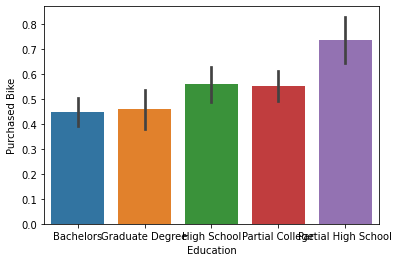

In [ ]:
import seaborn as sns
sns.barplot(df['Education'], df['Purchased Bike']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


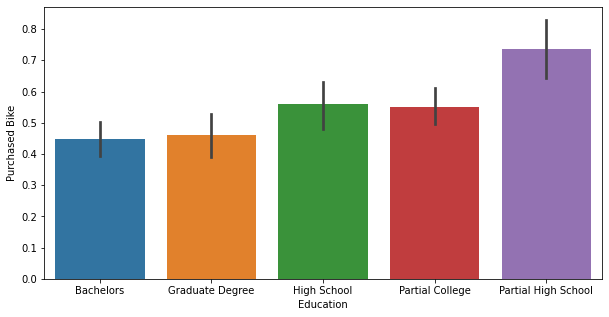

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(df['Education'], df['Purchased Bike']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Bachelors'),
 Text(0, 0, 'Graduate Degree'),
 Text(0, 0, 'High School'),
 Text(0, 0, 'Partial College'),
 Text(0, 0, 'Partial High School')]

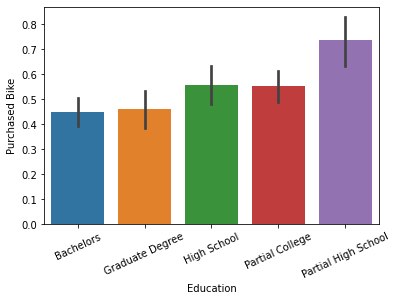

In [ ]:
viz = sns.barplot(df['Education'], df['Purchased Bike']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=25)

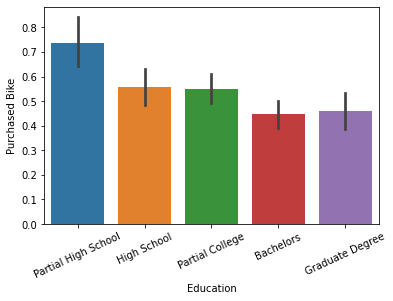

In [ ]:
viz = sns.barplot(x="Education", y="Purchased Bike", data=df,
                  order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

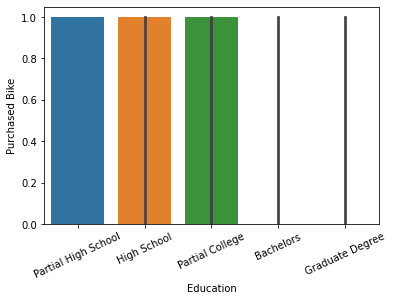

In [ ]:
from numpy import median

viz = sns.barplot(x="Education", y="Purchased Bike", data=df,
                  order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
                  estimator=median);
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

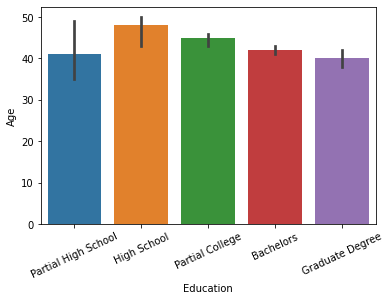

In [ ]:
from numpy import median

viz = sns.barplot(x="Education", y="Age", data=df,
                  order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
                  estimator=median);
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

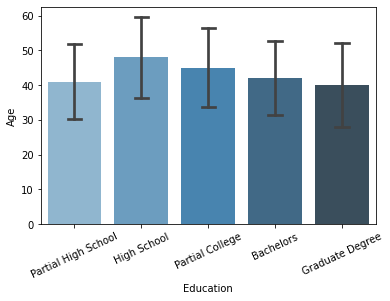

In [ ]:
viz = sns.barplot(x="Education", y="Age", data=df,
          order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
          estimator=median, ci="sd", capsize=.2, palette="Blues_d");
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

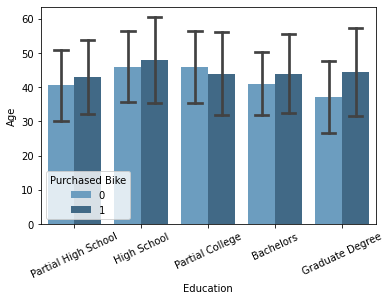

In [ ]:
viz = sns.barplot(x="Education", y="Age", hue="Purchased Bike", data=df,
            order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
            estimator=median, ci="sd", capsize=.2, palette="Blues_d");
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);


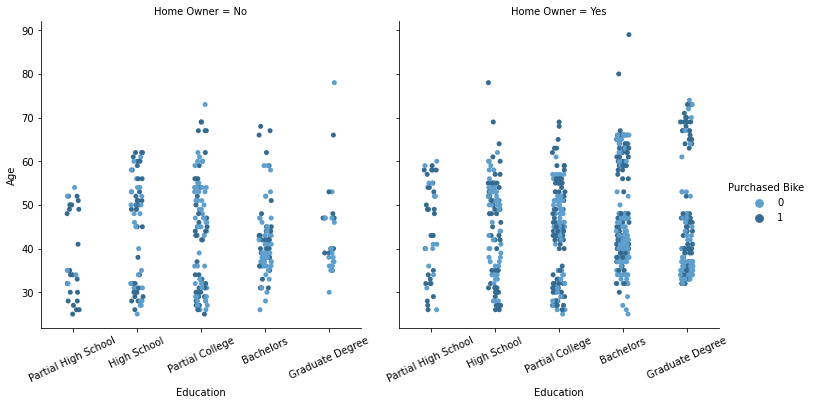

In [ ]:
viz = sns.catplot(x="Education", y="Age", hue="Purchased Bike", col="Home Owner", data=df,
            order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
            estimator=median, ci="sd", palette="Blues_d");
viz.set_xticklabels(rotation=25);

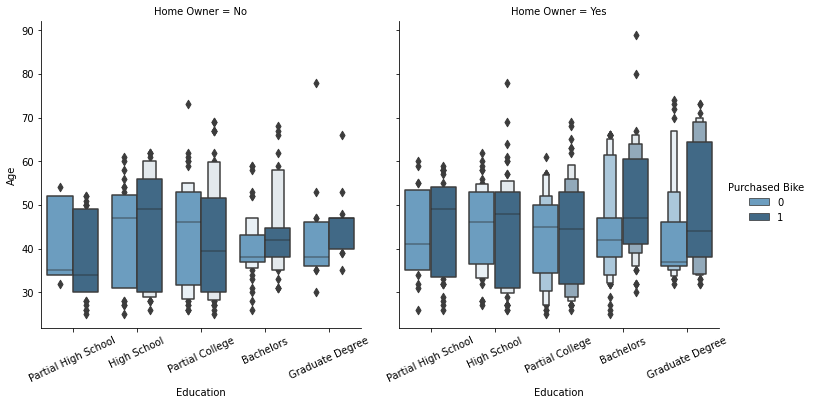

In [ ]:
viz = sns.catplot(x="Education", y="Age", hue="Purchased Bike", col="Home Owner", data=df,
          order=['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
          estimator=median, ci="sd", palette="Blues_d", kind="boxen");
viz.set_xticklabels(rotation=25);

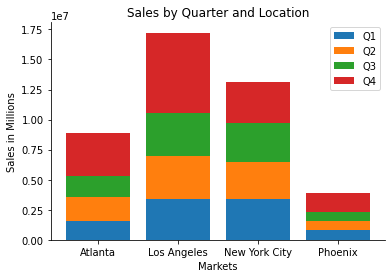

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

df = pd.DataFrame({'Locations':['Atlanta', 'Los Angeles', 'New York City', 'Phoenix'],
                'Q1 Sales':[1567811, 3391023, 3409871, 789123],
                'Q2 Sales':[1981237, 3609877, 3100098, 810988],
                'Q3 Sales':[1761231, 3509889, 3209876, 751233],
                'Q4 Sales':[3578900, 6712333, 3378900, 1500092]})

# Create the positions for the bars
x = np.arange(len(df.Locations))

# Store the three columns from the DataFrame and "flatten" them
# to appear as a regular Python list structure
list_1 = df['Q1 Sales'].values.flatten()
list_2 = df['Q2 Sales'].values.flatten()
list_3 = df['Q3 Sales'].values.flatten()
list_4 = df['Q4 Sales'].values.flatten()

# Plot the bar charts
plt.bar(x,list_1, label='Q1')
plt.bar(x,list_2, bottom=list_1, label='Q2')
plt.bar(x,list_3, bottom=list_1+list_2, label='Q3')
plt.bar(x,list_4, bottom=list_1+list_2+list_3, label='Q4')

# Plot the pokemon names as the x ticks
plt.xticks(x, df.Locations)

# Create a legend
plt.legend(loc='upper right')

# Add labels and title
plt.xlabel('Markets')
plt.ylabel('Sales in Millions')
plt.title('Sales by Quarter and Location')

# Add an SNS style and increase figure size
sns.set_style("white")
sns.set_context({"figure.figsize": (4, 6)})
sns.despine(top=True, right=True)

# Show the plot
plt.show()

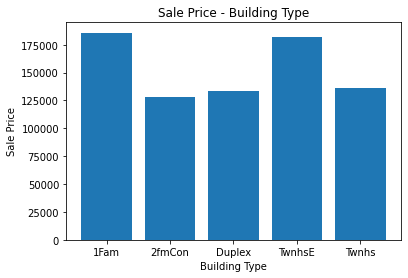

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('http://www.ishelp.info/data/housing.csv')

b_types = df.BldgType.unique()

means = []

for b_type in b_types:
  filtered = df[df.BldgType == b_type]
  means.append(round(filtered.SalePrice.mean(), 2))

plt.bar(b_types, means)
plt.title('Sale Price - Building Type')
plt.xlabel('Building Type')
plt.ylabel('Sale Price')
plt.show()

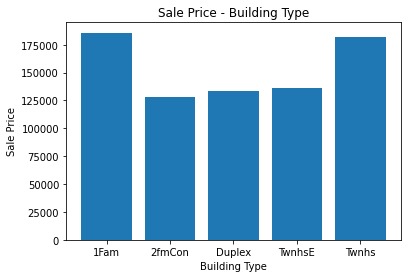

In [ ]:
means = df.groupby('BldgType').mean()['SalePrice'].round(2)
plt.bar(b_types, means)
plt.title('Sale Price - Building Type')
plt.xlabel('Building Type')
plt.ylabel('Sale Price')
plt.show()

In [ ]:
type(b_types)

numpy.ndarray

In [ ]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('http://www.ishelp.info/data/housing.csv')

one_fam = df[df.BldgType == '1Fam']
duplex = df[df.BldgType == 'Duplex']
t, p = stats.ttest_ind(one_fam.SalePrice, duplex.SalePrice)

print('t-Statistic:\t' + str(round(t,2)))
print('p-value:\t' + str(round(p, 2)))

t-Statistic:	4.54
p-value:	0.0


In [ ]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

df = pd.read_csv('http://www.ishelp.info/data/housing.csv')

mc = MultiComparison(df.SalePrice, df.BldgType)
mc.tukeyhsd()
#print(mc_results)

In [ ]:
import pandas as pd
from scipy import stats
df = pd.read_csv('http://www.ishelp.info/data/housing.csv')

# Create a unique list of building types
b_types = df.BldgType.unique()

ttests = []
count = 0

# Loop through that list
for i, b_t in enumerate(b_types): # Use the enumerate() function to add an index for counting to a list of values
  # For each item, loop through a second list of each item to compare each pair
  for i2, b_t2 in enumerate(b_types):
    if i2 > i: # If the inner_index is greater that the outer_index, then go ahead and run a t-test
      type_1 = df[df.BldgType == b_t]
      type_2 = df[df.BldgType == b_t2]
      t, p = stats.ttest_ind(type_1.SalePrice, type_2.SalePrice)

      # Add each t-test result to a list of t, p pairs
      ttests.append([b_t + ' - ' + b_t2, t.round(4), p.round(4)])

      # Increment the count
      count += 1

      # Let's also print them out just to make sure it's working
      print('t-Statistic:\t' + b_t + ' - ' + b_t2)
      print('t-Statistic:\t' + str(round(t, 2)))
      print('p-value:\t' + str(round(p, 2)))
      print('\n')

  # The new threshold for statistical significant = 0.05 / length of the ttests list
  p_threshold = 0.05 / len(ttests)
  print(p_threshold)

  # Now let's iterate through the results list and print only those that are significant based on the new threshold
  for pair in ttests:
    if pair[1] <= p_threshold: # The p-value is in the second index, hence 1
      print(pair)

t-Statistic:	1Fam - 2fmCon
t-Statistic:	3.85
p-value:	0.0


t-Statistic:	1Fam - Duplex
t-Statistic:	4.54
p-value:	0.0


t-Statistic:	1Fam - TwnhsE
t-Statistic:	0.48
p-value:	0.63


t-Statistic:	1Fam - Twnhs
t-Statistic:	3.94
p-value:	0.0


0.0125
t-Statistic:	2fmCon - Duplex
t-Statistic:	-0.73
p-value:	0.47


t-Statistic:	2fmCon - TwnhsE
t-Statistic:	-4.69
p-value:	0.0


t-Statistic:	2fmCon - Twnhs
t-Statistic:	-0.82
p-value:	0.42


0.0071428571428571435
['2fmCon - Duplex', -0.7292, 0.468]
['2fmCon - TwnhsE', -4.6948, 0.0]
['2fmCon - Twnhs', -0.8182, 0.4159]
t-Statistic:	Duplex - TwnhsE
t-Statistic:	-5.49
p-value:	0.0


t-Statistic:	Duplex - Twnhs
t-Statistic:	-0.33
p-value:	0.74


0.005555555555555556
['2fmCon - Duplex', -0.7292, 0.468]
['2fmCon - TwnhsE', -4.6948, 0.0]
['2fmCon - Twnhs', -0.8182, 0.4159]
['Duplex - TwnhsE', -5.4941, 0.0]
['Duplex - Twnhs', -0.3342, 0.739]
t-Statistic:	TwnhsE - Twnhs
t-Statistic:	4.6
p-value:	0.0


0.005
['2fmCon - Duplex', -0.7292, 0.468]
['2fmCon - 

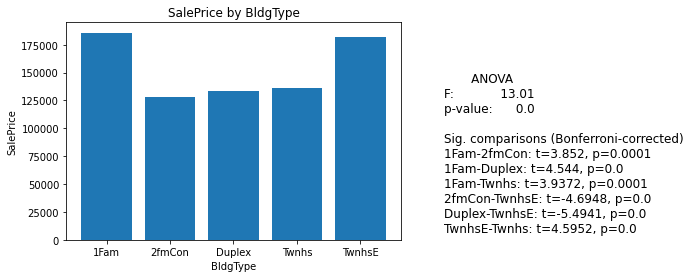

In [ ]:
def bar_chart(df, feature, label):
  import pandas as pd
  from scipy import stats
  from matplotlib import pyplot as plt

  means = df.groupby(feature).mean()[label].round(2)

  plt.bar(df.groupby(feature).groups.keys(), means)
  plt.title(label + " by " + feature)
  plt.xlabel(feature)
  plt.ylabel(label)

  # Same technique we learned in the bivstats() function to dynamically
  # enter multiple lists of label values for each categorical group
  groups = df[feature].unique()
  df_grouped = df.groupby(feature)
  group_labels = []
  for g in groups:
    g_list = df_grouped.get_group(g)
    group_labels.append(g_list[label])

  # Now calculate the ANOVA results
  oneway = stats.f_oneway(*group_labels)

  # Next, calculate t-tests with Bonferroni correction for p-value threshold
  unique_groups = df[feature].unique()
  ttests = []

  for i, group in enumerate(unique_groups):
    for i2, group_2 in enumerate(unique_groups):
      if i2 > i:
        type_1 = df[df[feature] == group]
        type_2 = df[df[feature] == group_2]
        t, p = stats.ttest_ind(type_1[label], type_2[label])
        ttests.append([group, group_2, t.round(4), p.round(4)])

  p_threshold = 0.05 / len(ttests) # Bonferroni-corrected p-value determined

  # Add all descriptive statistics to the diagram
  textstr  = '       ANOVA' + '\n'
  textstr += 'F:            ' + str(oneway[0].round(2)) + '\n'
  textstr += 'p-value:      ' + str(oneway[1].round(2)) + '\n\n'
  textstr += 'Sig. comparisons (Bonferroni-corrected)' + '\n'

  for ttest in ttests:
    if ttest[3] <= p_threshold:
      textstr += ttest[0] + '-' + ttest[1] + ": t=" + str(ttest[2]) + ", p=" + str(ttest[3]) + '\n'

  plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
  plt.show()


import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/housing.csv')
bar_chart(df, 'BldgType', 'SalePrice')

In [ ]:
 import pandas as pd

df = pd.read_csv("http://www.ishelp.info/data/lc_small.csv")
df.head(5)

,loan_status,loan_status_numeric,loan_amnt,issue_d,term,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,title,purpose,emp_title,emp_length,home_ownership,annual_inc,verification_status,acc_now_delinq,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,dti,grade,sub_grade
0,Fully Paid,6,5500,2017-11-01,36 months,7.35,170.71,5869.266021,5500.00,369.27,0.0,Debt consolidation,debt_consolidation,Senior Project Coordinator,4 years,RENT,62500.0,Not Verified,0.0,0.0,2013-07-01,0.0,NaN,NaN,6.0,0.0,7492,22.6,0.0,7492.0,9.0,33200.0,2.31,A,A4
1,Current,5,20000,2017-02-01,60 months,14.99,475.70,11375.160000,6275.78,5099.38,0.0,Debt consolidation,debt_consolidation,Teacher,10+ years,MORTGAGE,68000.0,Not Verified,0.0,0.0,1984-12-01,0.0,NaN,NaN,9.0,0.0,21482,64.5,0.0,29091.0,19.0,33300.0,16.03,C,C4
2,Current,5,25000,2018-11-01,36 months,7.02,772.16,2306.730000,1888.74,417.99,0.0,Credit card refinancing,credit_card,NaN,< 1 year,MORTGAGE,150000.0,Not Verified,0.0,0.0,2000-10-01,1.0,NaN,NaN,19.0,0.0,36104,39.3,0.0,567211.0,32.0,91900.0,17.63,A,A2
3,Current,5,16800,2018-07-01,36 months,15.02,582.55,4000.750000,2704.99,1295.76,0.0,Credit card refinancing,credit_card,Chief Operating Officer,5 years,MORTGAGE,164000.0,Source Verified,0.0,0.0,2003-09-01,0.0,36.0,NaN,4.0,0.0,29854,100.2,0.0,780426.0,8.0,29800.0,19.51,C,C3
4,Current,5,31300,2018-09-01,60 months,27.27,960.82,4709.260000,1305.65,3403.61,0.0,Debt consolidation,debt_consolidation,Deputy Network Homeless Coordinator,10+ years,MORTGAGE,122000.0,Not Verified,0.0,0.0,1994-12-01,1.0,63.0,NaN,17.0,0.0,11301,45.9,0.0,494372.0,50.0,24600.0,50.55,E,E5


In [ ]:
pd.DataFrame({'Count':df.count(),
              '% Missing':round(df.isnull().sum()/len(df)*100, 2), 
              'Unique':df.nunique(),
              'Type':df.dtypes})

,Count,% Missing,Unique,Type
loan_status,10476,0.00,6,object
loan_status_numeric,10476,0.00,6,int64
loan_amnt,10476,0.00,775,int64
issue_d,10476,0.00,35,object
term,10476,0.00,2,object
int_rate,10476,0.00,206,float64
installment,10476,0.00,5961,float64
total_pymnt,10476,0.00,10203,float64
total_rec_prncp,10476,0.00,7565,float64
total_rec_int,10476,0.00,10109,float64


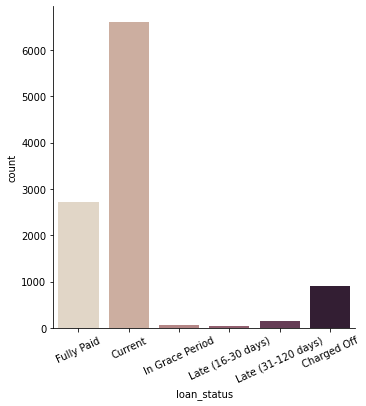

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
viz = sns.catplot(x='loan_status', kind='count', palette='ch:.25', data=df, order=['Fully Paid', 'Current', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)', 'Charged Off']);
viz.set_xticklabels(rotation=25);

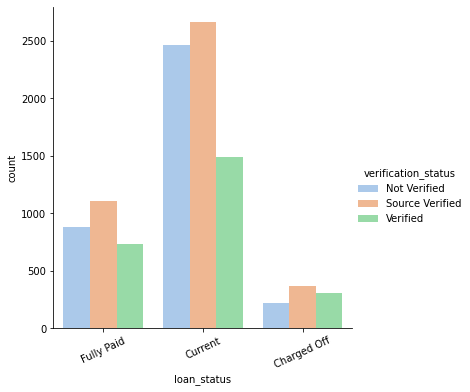

In [ ]:
viz = sns.catplot(x='loan_status', hue='verification_status', 
                  kind='count', palette='pastel', data=df, 
                  order = ['Fully Paid', 'Current', 'Charged Off'])
viz.set_xticklabels(rotation=25);

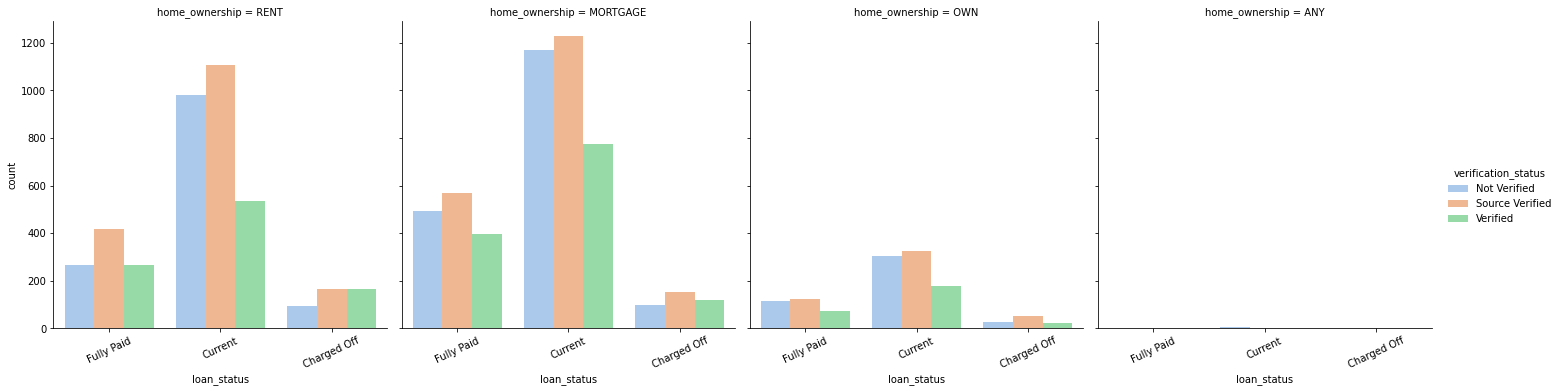

In [ ]:
viz = sns.catplot(x="loan_status", hue="verification_status", col="home_ownership",
                  kind="count", palette="pastel", data=df,
                  order=['Fully Paid', 'Current', 'Charged Off']);
viz.set_xticklabels(rotation=25);

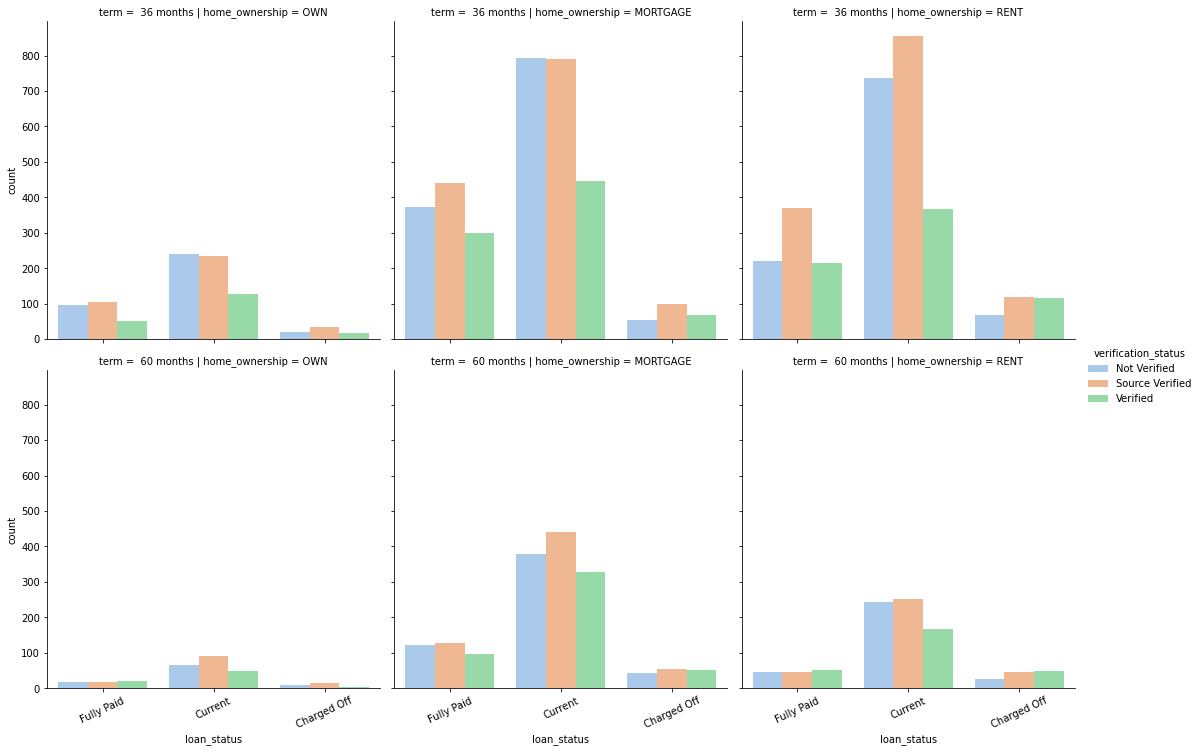

In [ ]:
viz = sns.catplot(x="loan_status", hue="verification_status",
                  col="home_ownership", row="term",
                  kind="count", palette="pastel", data=df,
                  order=['Fully Paid', 'Current', 'Charged Off'],
                  col_order=['OWN', 'MORTGAGE', 'RENT'],);
viz.set_xticklabels(rotation=25);

In [ ]:
df = pd.read_csv('http://www.ishelp.info/data/lc_xs.csv')
pd.crosstab(df['loan_status'], df['verification_status'])

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,391,704,613
Current,5000,5281,2987
Fully Paid,1802,2209,1473
In Grace Period,29,48,29
Late (16-30 days),24,21,27
Late (31-120 days),75,128,110


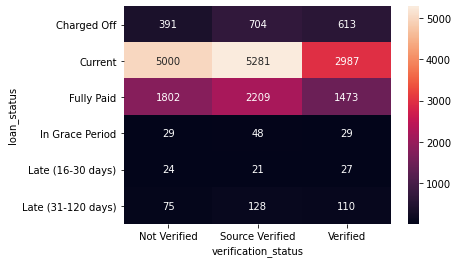

In [ ]:
sns.heatmap(pd.crosstab(df.loan_status, df.verification_status), annot=True, fmt='d')

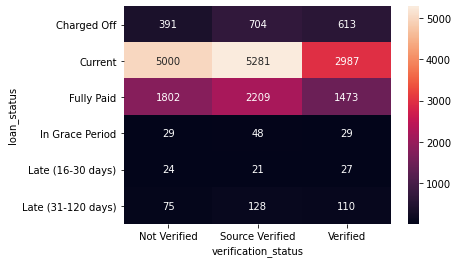

In [ ]:
sns.heatmap(pd.crosstab(df['loan_status'], df['verification_status']), annot=True, fmt='d')

In [ ]:
df.drop(df[df.loan_status == 'In Grace Period'].index, inplace=True)
df.loan_status.unique()

array(['Current', 'Charged Off', 'Fully Paid', 'Late (31-120 days)',
       'Late (16-30 days)'], dtype=object)

In [ ]:
df.loan_status.replace({'Late (16-30 days)':'Charged Off', 'Late (31-120 days)':'Charged Off'}, inplace=True)
df.loan_status.unique()

array(['Current', 'Charged Off', 'Fully Paid'], dtype=object)

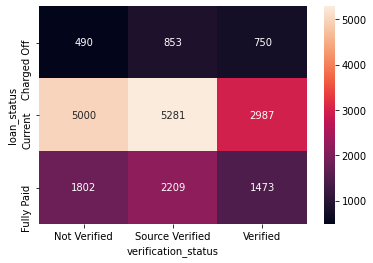

In [ ]:
sns.heatmap(pd.crosstab(df.loan_status, df.verification_status), annot=True, fmt='d')

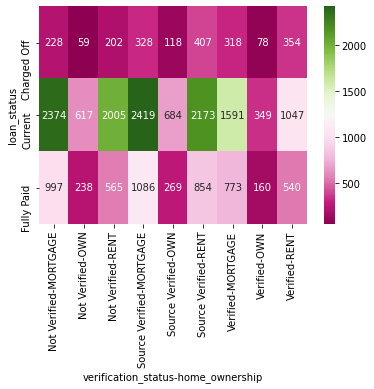

In [ ]:
df.drop(df[df.home_ownership == 'ANY'].index, inplace=True)

crosstab = pd.crosstab(index=df['loan_status'], columns=[df['verification_status'], df['home_ownership']])
sns.heatmap(crosstab, annot=True, fmt = 'd', cmap='PiYG');

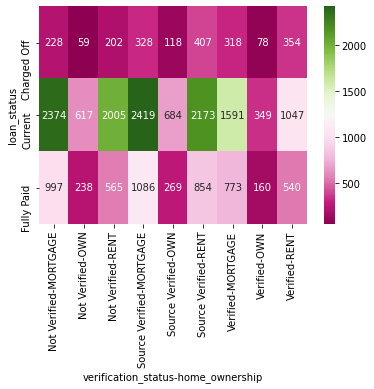

In [ ]:
crosstab = pd.crosstab(index=df.loan_status, columns=[df.verification_status, df.home_ownership])
sns.heatmap(crosstab, annot=True, fmt = 'd', cmap='PiYG');

Chi-Squared


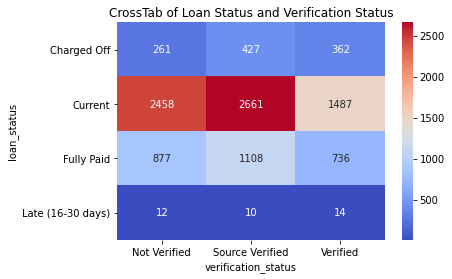

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('http://www.ishelp.info/data/lc_xxs.csv')
df.drop(df[df.loan_status == "In Grace Period"].index, inplace=True)
df.loan_status.replace({'Late ( 16-30 days)':'Charged Off','Late (31-120 days)':'Charged Off'}, inplace=True)
df.drop(df[df.home_ownership == "ANY"].index, inplace=True)

crosstab = pd.crosstab(df['loan_status'], df['verification_status'])
plt.title('CrossTab of Loan Status and Verification Status')
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm');

X square:		109.2277
p-value:		0.0
Degrees of freedom:	6



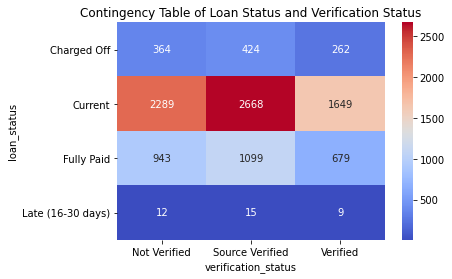

In [ ]:
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2

X, p, dof, contingency_table = chi2_contingency(crosstab)

print(f'X square:\t\t{round(X, 4)}')
print(f'p-value:\t\t{round(p, 10)}')
print(f'Degrees of freedom:\t{dof}\n')

ct_df = pd.DataFrame(np.rint(contingency_table).astype('int64'), columns=crosstab.columns, index=crosstab.index)
plt.title('Contingency Table of Loan Status and Verification Status')
sns.heatmap(ct_df, annot=True, fmt='d', cmap='coolwarm');

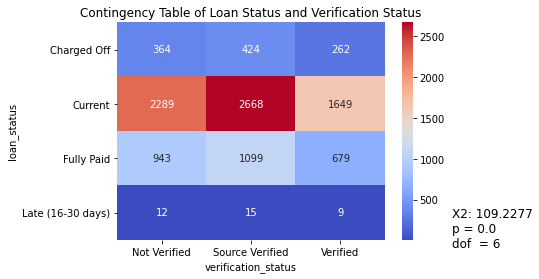

In [ ]:
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2

X, p, dof, contingency_table = chi2_contingency(crosstab)

textstr  = 'X2: ' + str(round(X, 4))+ '\n'
textstr += 'p = ' + str(round(p, 4)) + '\n'
textstr += 'dof  = ' + str(dof)
plt.text(0.9, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)

ct_df = pd.DataFrame(np.rint(contingency_table).astype('int64'), columns=crosstab.columns, index=crosstab.index)
plt.title('Contingency Table of Loan Status and Verification Status')
sns.heatmap(ct_df, annot=True, fmt='d', cmap='coolwarm');

In [ ]:
import pandas as pd
from scipy import stats
df = pd.read_csv('http://www.ishelp.info/data/lc_small.csv')

# Step 1. Check to see if any value in the contingeny table is less than 5
flag = False              # Start by creating a variable to indicate (True/False) whether any value is below 5
crosstab_df = pd.DataFrame(pd.crosstab(df['loan_amnt'], df['loan_status'])) # Generate the contingency table
for col in crosstab_df:
  if crosstab_df[col].min() < 5: # Use the min() funtion to get the lowest value in the DataFrame
    flag = True             # If the min is less than 5, then flag it as 'True'
    break                   # No need to keep looping if there is a problem with any group min

if flag: # If at least one of the values was less than 5, then bin into 10 ranges
  # Step 2. Determine what the cutoff value is for each of the 10 buckets
  q1 = np.quantile(df['loan_amnt'], .10)
  q2 = np.quantile(df['loan_amnt'], .20)
  q3 = np.quantile(df['loan_amnt'], .30)
  q4 = np.quantile(df['loan_amnt'], .40)
  q5 = np.quantile(df['loan_amnt'], .50)
  q6 = np.quantile(df['loan_amnt'], .60)
  q7 = np.quantile(df['loan_amnt'], .70)
  q8 = np.quantile(df['loan_amnt'], .80)
  q9 = np.quantile(df['loan_amnt'], .90)

  bucket_list = pd.DataFrame(columns=['cutoffs'])
  i = 0 # We need a variable to indicate what index to store the bucket
  # Loop through the raw data and assign a new quantile value in place of the original value
  for v in df['loan_amnt']:
    if v < q1:
      bucket_list.loc[i] = q1
    elif v >= q1 and v < q2:
      bucket_list.loc[i] = q2
    elif v >= q2 and v < q3:
      bucket_list.loc[i] = q3
    elif v >= q3 and v < q4:
      bucket_list.loc[i] = q4
    elif v >= q4 and v < q5:
      bucket_list.loc[i] = q5
    elif v >= q5 and v < q6:
      bucket_list.loc[i] = q6
    elif v >= q6 and v < q7:
      bucket_list.loc[i] = q7
    elif v >= q7 and v < q8:
      bucket_list.loc[i] = q8
    elif v >= q8 and v < q9:
      bucket_list.loc[i] = q9
    else:
      bucket_list.loc[i] = df['loan_amnt'].max()
    i += 1
  # Step 4. Use the new list (actually a DataFrame of one column) in place of the raw data to create the new conteingency table
  contingency_table = pd.crosstab(bucket_list['cutoffs'], df['loan_status'])
else: # If none of the contingey table values are below 5, then just proceed with the data as is
  contingency_table = pd.crosstab(df['loan_amnt'], df['loan_status']) # Calculate the crosstab

stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square stat: " + str(stat))
print("P-value: " + str(p))

Chi-square stat: 108.11272522421773
P-value: 4.120737539625209e-07


MLR in StatsModels


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = 'insurance'
label = 'charges'
df = pd.read_csv('http://www.ishelp.info/data/' + data + '.csv')

# Set label and features
y = df[label]
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=[label])

# Run the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()

# View results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           8.80e-37
Time:                        23:02:06   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          239.9945     22.289     10.767      0.0

In [ ]:
def mlr_fit(results, actual):
  import numpy as np

  residuals = np.array(actual) - np.array(results.fittedvalues)
  rmse = np.sqrt(sum((residuals**2))/len(actual))

  mae = np.mean(abs(np.array(actual) - np.array(results.fittedvalues)))

  metrics  = "R-squared:\t" + str(round(results.rsquared, 4)) + "\n"
  metrics += "R2-adjusted:\t" + str(round(results.rsquared_adj, 4)) + "\n"
  metrics += "RMSE:\t\t" + str(round(rmse, 4)) + "\n"
  metrics += "MAE:\t\t" + str(round(mae, 4)) + "\n"
  metrics += "Label mean:\t" + str(round(np.mean(actual), 4))

  return metrics

In [ ]:
print(mlr_fit(results, df[label]))

R-squared:	0.1201
R2-adjusted:	0.1181
RMSE:		11355.3179
MAE:		9015.4422
Label mean:	13270.4223


In [ ]:
df['predicted'] = results.fittedvalues

diff = []
for row in df.itertuples():
  diff.append(abs(row[8] - row[7]))

df['diff'] = diff
df[['age', 'bmi','children','charges','predicted','diff']].head(10)

,age,bmi,children,charges,predicted,diff
0,19,27.900,0,16884.92400,6908.777533,9976.146467
1,18,33.770,1,1725.55230,9160.977061,7435.424761
2,28,33.000,3,4449.46200,12390.946918,7941.484918
3,33,22.705,0,21984.47061,8543.527095,13440.943515
4,32,28.880,0,3866.85520,10354.147396,6487.292196
5,31,25.740,0,3756.62160,9071.411158,5314.789558
6,46,33.440,1,8240.58960,15771.234831,7530.645231
7,37,27.740,3,7281.50560,12804.138689,5522.633089
8,37,29.830,2,6406.41070,12955.328269,6548.917569
9,60,25.840,0,28923.13692,16064.459249,12858.677671
